In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# 1. Load the dataset
# Assuming your dataset has columns 'age', 'race', and 'shot_by_police'
data = pd.read_csv('/content/drive/MyDrive/UMASS_D/MTH UMASS-D/Police Shootings Age Race.csv')
data

,age,race
0,8,B
1,13,B
2,14,B
3,15,B
4,15,B
...,...,...
6049,84,W
6050,88,W
6051,88,W
6052,91,W


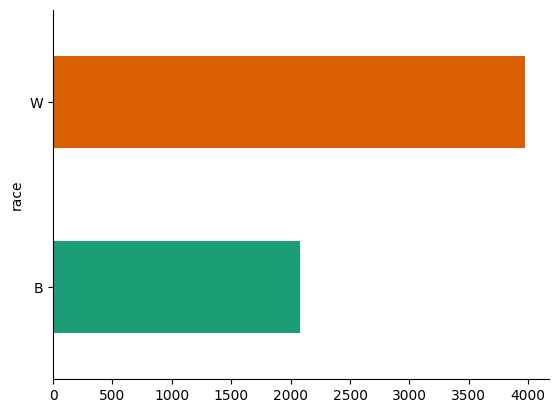

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

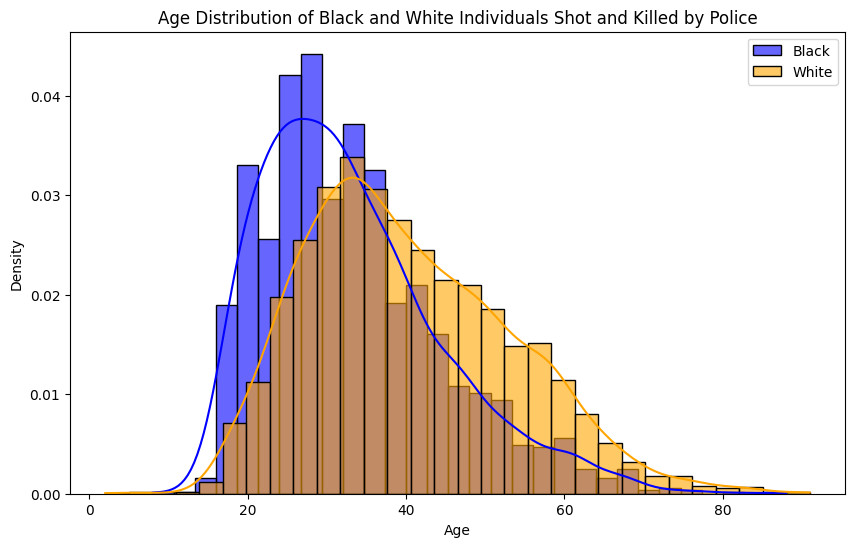

In [ ]:
plt.figure(figsize=(10, 6))
# 1. Filter the data for Black and White individuals
black_ages = data[data['race'] == 'B']['age'].dropna()
white_ages = data[data['race'] == 'W']['age'].dropna()

# Histogram with density
sns.histplot(black_ages, color='blue', label='Black', kde=True, stat='density', bins=30, alpha=0.6)
sns.histplot(white_ages, color='orange', label='White', kde=True, stat='density', bins=30, alpha=0.6)

# 3. Add labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution of Black and White Individuals Shot and Killed by Police')
plt.legend()

# 4. Show the plot
plt.show()

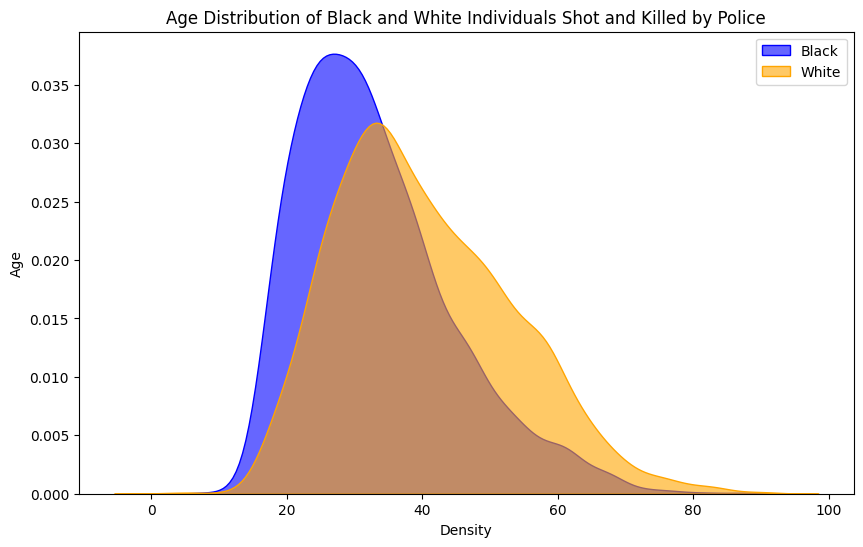

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'black_ages' and 'white_ages' are already filtered

plt.figure(figsize=(10, 6))

# KDE plot for Black individuals with filled color
sns.kdeplot(x=black_ages, color='blue', label='Black', fill=True, alpha=0.6)

# KDE plot for White individuals with filled color
sns.kdeplot(x=white_ages, color='orange', label='White', fill=True, alpha=0.6)

# Add labels and title
plt.ylabel('Age')
plt.xlabel('Density')
plt.title('Age Distribution of Black and White Individuals Shot and Killed by Police')
plt.legend()

# Show the plot
plt.show()


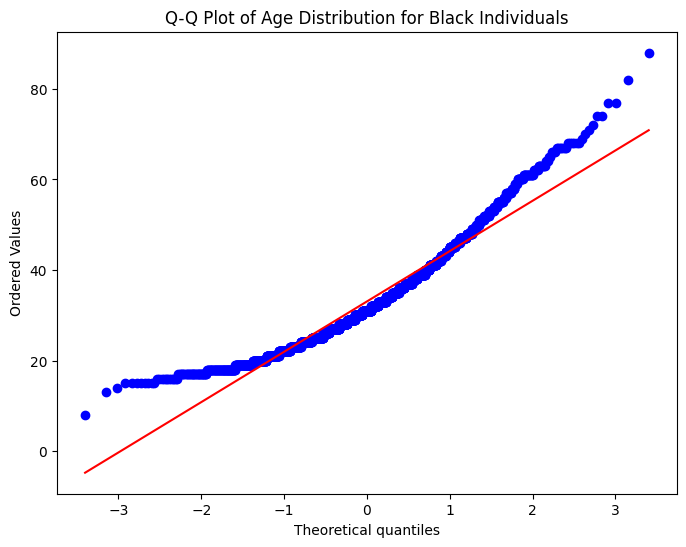

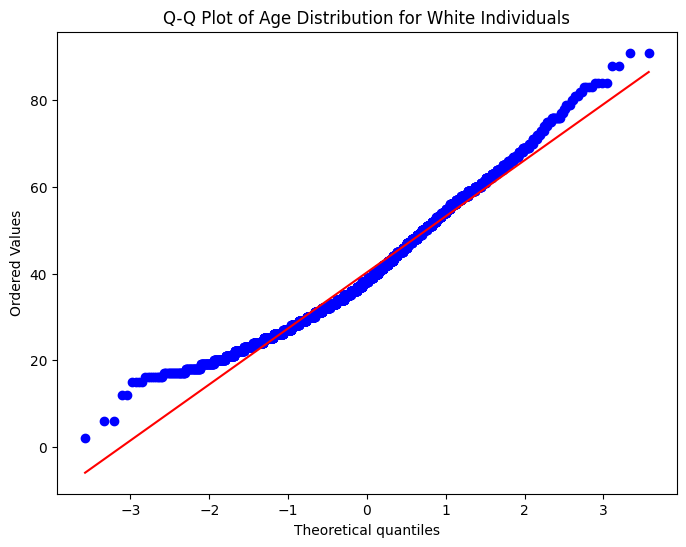

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


# 2. Generate Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(black_ages, dist="norm", plot=plt, fit=True)
plt.title('Q-Q Plot of Age Distribution for Black Individuals')
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(white_ages, dist="norm", plot=plt, fit=True)
plt.title('Q-Q Plot of Age Distribution for White Individuals')
plt.show()


In [ ]:


# 1. Filter for Black (B) individuals
black_data = data[data['race'] == 'B']

# 2. Filter for White (W) individuals
white_data = data[data['race'] == 'W']

# 3. Extract ages for Black individuals
black_ages = black_data['age'].dropna()  # Removing missing values (if any)

# 4. Extract ages for White individuals
white_ages = white_data['age'].dropna()  # Removing missing values (if any)

# Optional: Display the separated data to verify
print("Black ages:")
print(black_ages)

print("White ages:")
print(white_ages)


Black ages:
0        8
1       13
2       14
3       15
4       15
        ..
2073    74
2074    77
2075    77
2076    82
2077    88
Name: age, Length: 2078, dtype: int64
White ages:
2078     2
2079     6
2080     6
2081    12
2082    12
        ..
6049    84
6050    88
6051    88
6052    91
6053    91
Name: age, Length: 3976, dtype: int64


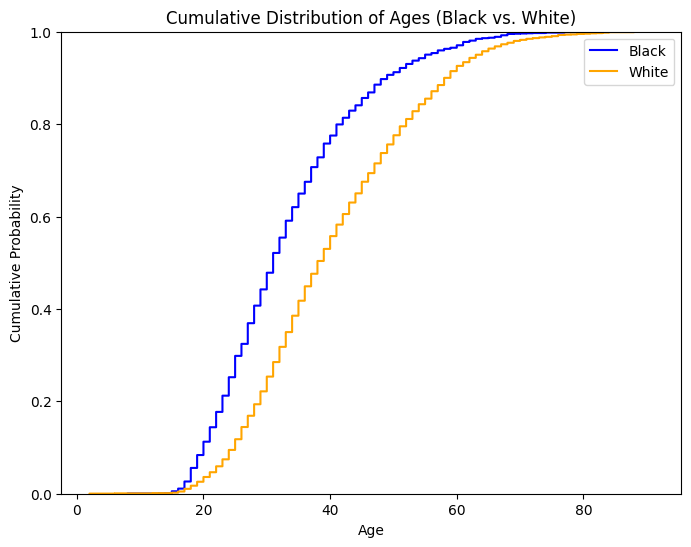

In [ ]:
# 3.import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Using seaborn's ecdfplot to plot the CDFs
sns.ecdfplot(black_ages, label='Black', color='blue')
sns.ecdfplot(white_ages, label='White', color='orange')

# 3. Add labels and title
plt.xlabel('Age')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Ages (Black vs. White)')
plt.legend()

# 4. Show the plot
plt.show()

In [ ]:
import numpy as np

# Assuming 'black_ages' and 'white_ages' are already created as per the previous steps

# 1. Function to calculate Cohen's d
def cohens_d(group1, group2):
    mean1, mean2 = np.mean(group1), np.mean(group2)
    pooled_std = np.sqrt((np.std(group1, ddof=1)**2 + np.std(group2, ddof=1)**2) / 2)  # Pooled standard deviation
    return (mean1 - mean2) / pooled_std

# 2. Calculate Cohen's d for Black and White ages
effect_size = cohens_d(black_ages, white_ages)

# 3. Print the result
print(f"Cohen's d (Effect size) between Black and White ages: {effect_size}")


Cohen's d (Effect size) between Black and White ages: -0.5873490256473157


In [ ]:
import numpy as np

# Assuming 'black_ages' and 'white_ages' are already created

# 1. Calculate the observed difference in means
observed_diff = np.mean(white_ages) - np.mean(black_ages)

# 2. Combine the two age groups
combined_ages = np.concatenate([black_ages, white_ages])

# 3. Set up Monte Carlo simulation parameters
n_simulations = 10000  # Number of simulations
count = 0

# 4. Perform Monte Carlo simulation
for _ in range(n_simulations):
    np.random.shuffle(combined_ages)
    sim_black = combined_ages[:len(black_ages)]
    sim_white = combined_ages[len(black_ages):]
    sim_diff = np.mean(sim_white) - np.mean(sim_black)

    if abs(sim_diff) >= abs(observed_diff):
        count += 1

# 5. Calculate the p-value
p_value_monte_carlo = count / n_simulations

# 6. Print the results
print(f"Observed difference in means: {observed_diff}")
print(f"Monte Carlo p-value: {p_value_monte_carlo}")


Observed difference in means: 7.222270824175077
Monte Carlo p-value: 0.0


In [ ]:
# t test
from scipy import stats

# Assuming black_ages and white_ages are the age series for Black and White individuals
# Perform an independent T-test
t_stat, p_value = stats.ttest_ind(black_ages, white_ages)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The difference in means is statistically significant.")
else:
    print("The difference in means is not statistically significant.")


T-statistic: -21.257464575572655
P-value: 9.020231053936359e-97
The difference in means is statistically significant.


In [ ]:
#Question 2
#crab molt dataset
import pandas as pd
data1=pd.read_csv('/content/drive/MyDrive/UMASS_D/MTH UMASS-D/Crab_molt.csv')
data1

,post molt size,pre molt size
0,127.7,113.6
1,133.2,118.1
2,135.3,119.9
3,143.3,126.2
4,139.3,126.7
...,...,...
471,129.2,114.4
472,NaN,NaN
473,NaN,NaN
474,NaN,NaN


In [ ]:
import numpy as np
import pandas as pd

# Assuming your data is in a DataFrame, for example:
# data = pd.read_csv('crab_molt.csv')  # Load the dataset if necessary

# 1. Drop NaN values
data_clean = data1.dropna()

# 2. Split into two groups (e.g., column 1 and column 2)
group1 = data_clean.iloc[:, 0]  # First column of data
group2 = data_clean.iloc[:, 1]  # Second column of data

# 3. Calculate the observed difference in means
observed_diff = np.mean(group1) - np.mean(group2)

# 4. Combine both groups for shuffling
combined = np.concatenate([group1, group2])

# 5. Set up Monte Carlo simulation
n_simulations = 10000  # Number of simulations
count = 0

for _ in range(n_simulations):
    np.random.shuffle(combined)
    sim_group1 = combined[:len(group1)]
    sim_group2 = combined[len(group1):]
    sim_diff = np.mean(sim_group1) - np.mean(sim_group2)

    if abs(sim_diff) >= abs(observed_diff):
        count += 1

# 6. Calculate p-value
p_value_monte_carlo = count / n_simulations
print(f"Observed difference in means: {observed_diff}")
print(f"Monte Carlo p-value: {p_value_monte_carlo}")


Observed difference in means: 14.685805084745766
Monte Carlo p-value: 0.0


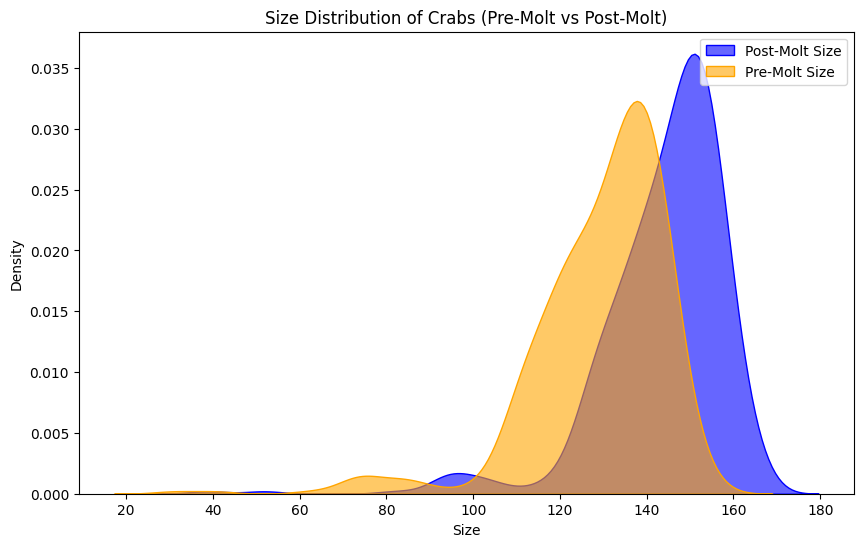

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'post_molt_size' and 'pre_molt_size' are already filtered from the crab dataset

plt.figure(figsize=(10, 6))

# KDE plot for Post-Molt size with filled color
sns.kdeplot(x=group1, color='blue', label='Post-Molt Size', fill=True, alpha=0.6)

# KDE plot for Pre-Molt size with filled color
sns.kdeplot(x=group2, color='orange', label='Pre-Molt Size', fill=True, alpha=0.6)

# Add labels and title
plt.ylabel('Density')
plt.xlabel('Size')
plt.title('Size Distribution of Crabs (Pre-Molt vs Post-Molt)')
plt.legend()

# Show the plot
plt.show()


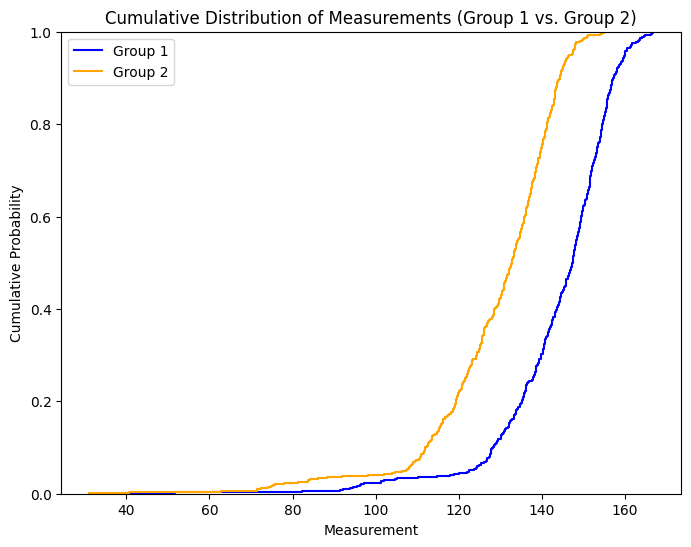

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the Empirical CDFs for the two groups
plt.figure(figsize=(8, 6))
sns.ecdfplot(group1, label='Group 1', color='blue')
sns.ecdfplot(group2, label='Group 2', color='orange')

# Add labels and title
plt.xlabel('Measurement')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Measurements (Group 1 vs. Group 2)')
plt.legend()
plt.show()

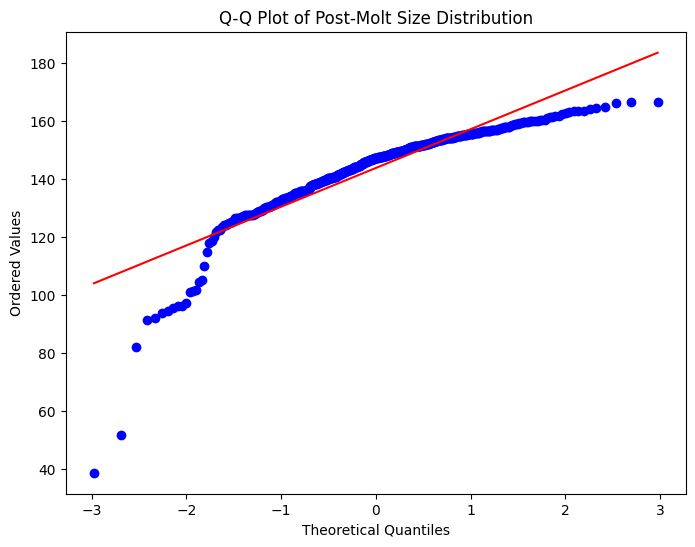

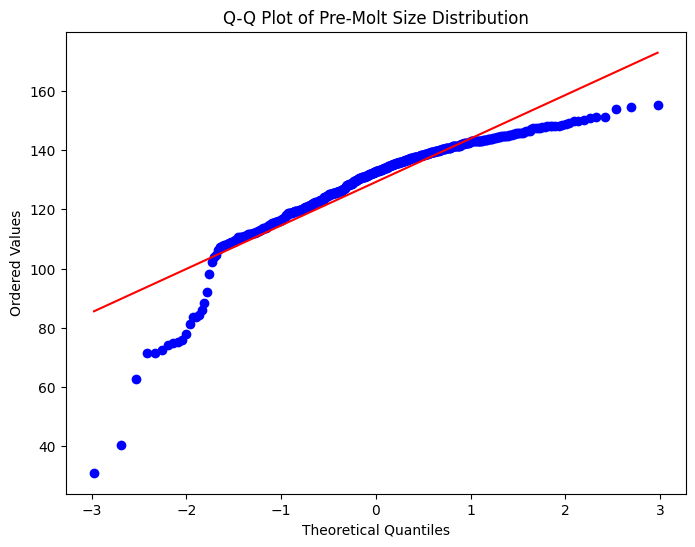

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming the 'crab_data' DataFrame contains 'post molt size' and 'pre molt size' columns
# If not already loaded, use:
# crab_data = pd.read_csv('crab_molt_data.csv')

# 1. Filter the data for Post-molt and Pre-molt sizes
post_molt_size = data1['post molt size'].dropna()
pre_molt_size = data1['pre molt size'].dropna()

# 2. Generate Q-Q plot for Post-molt size
plt.figure(figsize=(8, 6))
stats.probplot(post_molt_size, dist="norm", plot=plt, fit=True)
plt.title('Q-Q Plot of Post-Molt Size Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

# 3. Generate Q-Q plot for Pre-molt size
plt.figure(figsize=(8, 6))
stats.probplot(pre_molt_size, dist="norm", plot=plt, fit=True)
plt.title('Q-Q Plot of Pre-Molt Size Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()


In [ ]:
# Function to calculate Cohen's d
def cohens_d(group1, group2):
    mean1, mean2 = np.mean(group1), np.mean(group2)
    pooled_std = np.sqrt((np.std(group1, ddof=1)**2 + np.std(group2, ddof=1)**2) / 2)  # Pooled standard deviation
    return (mean1 - mean2) / pooled_std

# Calculate Cohen's d
effect_size = cohens_d(group1, group2)
print(f"Cohen's d (Effect size) between the two groups: {effect_size}")


Cohen's d (Effect size) between the two groups: 0.9620678692342477


In [ ]:
# t test
from scipy import stats

# Assuming black_ages and white_ages are the age series for Black and White individuals
# Perform an independent T-test
t_stat, p_value = stats.ttest_ind(group1,group2)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The difference in means is statistically significant.")
else:
    print("The difference in means is not statistically significant.")


T-statistic: 14.779567045859308
P-value: 1.3090298771684542e-44
The difference in means is statistically significant.
